In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import data - business lisences 
business = pd.read_csv('Business_Licenses_-_Current_Active.csv')
business = business[business.CITY == 'CHICAGO']
business.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,2753996-20201119,2753996,208984,1,THE FRANCES XAVIER WARDE SCHOOL NFP,THE FRANCES XAVIER WARDE SCHOOL NFP,751 N STATE ST,CHICAGO,IL,60610.0,...,11/19/2020,05/15/2021,10/09/2020,11/19/2020,AAI,NaN,NaN,41.896422,-87.628046,"(41.89642201551983, -87.62804636360084)"
1,2704238-20200516,2723390,458482,2,"ARMED FORCES POST 8322, VETERANS OF FOREIGN WA...","ARMED FORCES POST 8322, VETERANS OF FOREIGN WA...",7173 W GRAND AVE GROUND,CHICAGO,IL,60707.0,...,05/16/2020,05/15/2021,11/24/2020,11/25/2020,AAI,NaN,NaN,41.923768,-87.805433,"(41.9237675637846, -87.80543279195435)"
7,2712490-20200428,2712490,465977,1,MP BROTHERS OHM LLC,SHERIDAN LIQUOR & LOUNGE,3944-3946 N SHERIDAN RD 1,CHICAGO,IL,60613.0,...,04/28/2020,05/15/2021,04/28/2020,04/28/2020,AAI,NaN,17.0,41.954060,-87.654680,"(41.95405970426544, -87.65468014494112)"
13,2398363-20190516,2656761,398289,1,MARIA'S NOTARY CORP.,MARIA'S TAX & NOTARY,1742 W CHICAGO AVE,CHICAGO,IL,60622.0,...,05/16/2019,05/15/2021,04/04/2019,04/05/2019,AAI,NaN,29.0,41.896115,-87.671358,"(41.896115497592454, -87.67135842538231)"
14,2184753-20190516,2654791,265498,2,LUCKY DOG PET SERVICES,LUCKY DOG PET SERVICE,2945 N ELSTON AVE,CHICAGO,IL,60618.0,...,05/16/2019,05/15/2021,04/24/2019,04/25/2019,AAI,NaN,NaN,41.935032,-87.691754,"(41.93503163276348, -87.69175414089078)"


In [17]:
# find missing values
business.isnull().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                  30
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                54
WARD                                    89
PRECINCT                             11983
WARD PRECINCT                           82
POLICE DISTRICT                      11566
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
BUSINESS ACTIVITY ID                  6456
BUSINESS ACTIVITY                     6456
LICENSE NUMBER                           0
APPLICATION TYPE                         0
APPLICATION CREATED DATE             48781
APPLICATION REQUIREMENTS COMPLETE        9
PAYMENT DATE                           269
CONDITIONAL

In [18]:
# drop rows with missing ward value
business = business[business['WARD'].notna()]
# convert ward to int type
business.WARD = business.WARD.astype('int')

In [19]:
# shape of df
business.shape

(63036, 34)

In [20]:
# columns in df
business.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'BUSINESS ACTIVITY ID', 'BUSINESS ACTIVITY',
       'LICENSE NUMBER', 'APPLICATION TYPE', 'APPLICATION CREATED DATE',
       'APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE',
       'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS', 'LICENSE STATUS CHANGE DATE', 'SSA',
       'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [45]:
# number of possible business licenses
len(business['LICENSE DESCRIPTION'].unique())

48

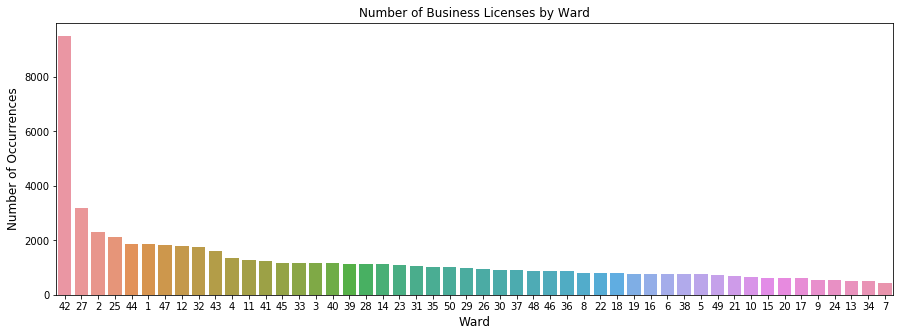

In [22]:
# plot count of licenses by ward
bus_cnts = business['WARD'].value_counts()
order = list(bus_cnts.index)
plt.figure(figsize=(15,5))
sns.barplot(bus_cnts.index, bus_cnts.values, order=order)
plt.title('Number of Business Licenses by Ward')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Ward', fontsize=12)
#plt.xticks(rotation=70)
plt.show()

In [36]:
# percent of license in top five category of license type
bus_cnts = business['WARD'].value_counts()
sum(bus_cnts[:1])/sum(bus_cnts)

0.1508185798591281

In [51]:
BBox

(-87.933976504, -87.524803843, 41.644670132, 42.022660268)

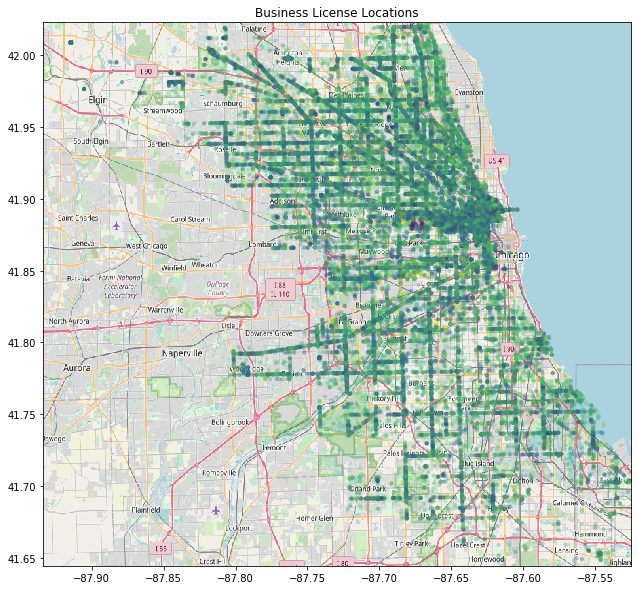

In [52]:
# create dataframe of business locations
geo_df = business[['LATITUDE', 'LONGITUDE', 'LICENSE DESCRIPTION']]
BBox = (geo_df.LONGITUDE.min(), geo_df.LONGITUDE.max(), geo_df.LATITUDE.min(), geo_df.LATITUDE.max())
# import map of Chicago
ruh_m = plt.imread('chicago_map.png')
# plot business location
fig, ax = plt.subplots(figsize = (15,10))
categories = np.unique(geo_df['LICENSE DESCRIPTION'])
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))  
geo_df["Color"] = geo_df['LICENSE DESCRIPTION'].apply(lambda x: colordict[x])
ax.scatter(geo_df.LONGITUDE, geo_df.LATITUDE, zorder=1, alpha= 0.2, c=geo_df.Color, s=10)
ax.set_title('Business License Locations')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [43]:
# percent of licenses issues above latitude = 41.85
geo_df[geo_df.LATITUDE > 41.85]['LATITUDE'].count()/geo_df['LATITUDE'].count()

0.7266783194147731

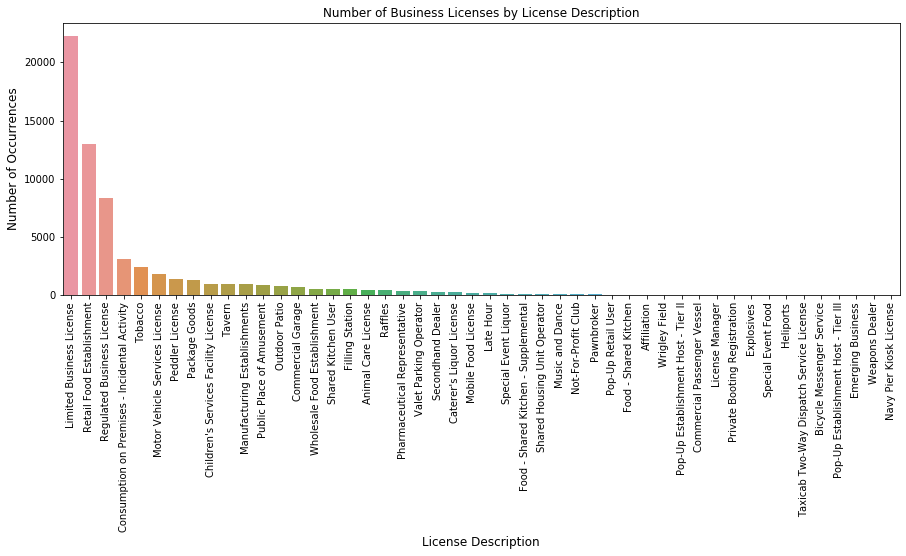

In [26]:
# plot count of licenses by ward
bus_cnts = business['LICENSE DESCRIPTION'].value_counts()
order = list(bus_cnts.index)
plt.figure(figsize=(15,5))
sns.barplot(bus_cnts.index, bus_cnts.values, order=order)
plt.title('Number of Business Licenses by License Description')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('License Description', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [32]:
# percent of license in top five category of license type
type_cnt = business['LICENSE DESCRIPTION'].value_counts()
sum(type_cnt[:5])/sum(type_cnt)

0.7786185671679675